<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Seaborn: Data Visualization
</p>
</div>

Data Science Cohort Live NYC August 2023
<p>Phase 1: Topic 4.3</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn is going to be your friend
import seaborn as sns

Let's also load the penguins dataset:
- Seaborn has standard datasets that you can load in.
- sns.get_dataset_names()

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


There are probably some cleaning tasks here:
- e.g., drop missing values, etc.

In [6]:
penguins_df.dropna(inplace = True)
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


There are numeric columns (floats):
- bill length
- flipper length
- body mass

There are some categoricals as well:

In [7]:
print(penguins_df.species.unique()) 

['Adelie' 'Chinstrap' 'Gentoo']


In [8]:
print(penguins_df.sex.unique()) 

['Male' 'Female']


In [9]:
print(penguins_df.island.unique()) 

['Torgersen' 'Biscoe' 'Dream']


For the purpose of speed/memory usage:
- convert string columns (objects) to type categorical.

In [10]:
cat_cols =  ['species', 'island', 'sex']

penguins_df[cat_cols] = \
penguins_df[cat_cols].astype('category')

In [11]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


#### The Seaborn package

- Designed for statistical visualization and EDA
- Library built on top of matplotlib
- Seaborn can interface with plt.subplots()

#### A simple plot command: scatter plot 
- sns.scatterplot
- reference dataframe (data = ___)
- can reference column name strings directly

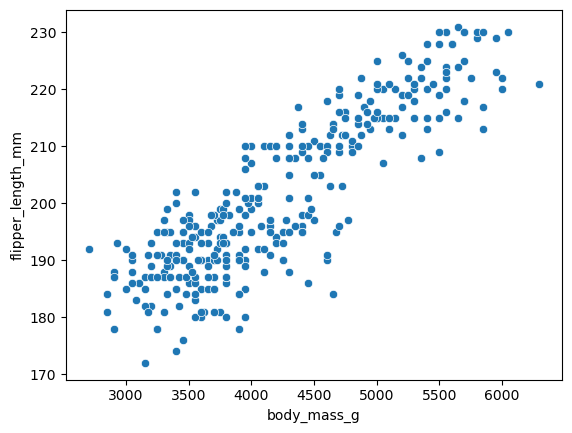

In [12]:
# Creating a scatter plot: 

sns.scatterplot(x = 'body_mass_g', y = 'flipper_length_mm', data = penguins_df )
plt.show()

Interfaces with plt.subplots:
- ax = __ option: points seaborn to matplotlib ax object

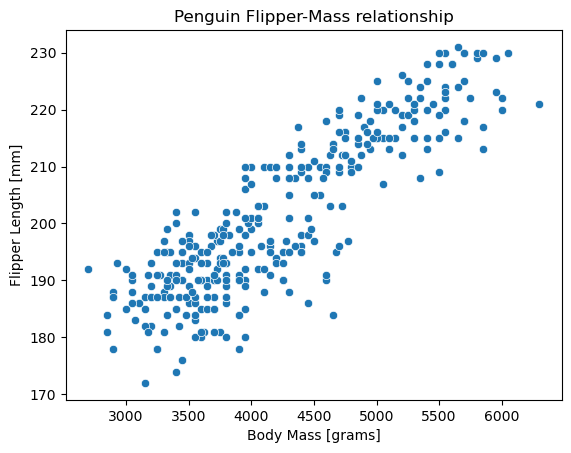

In [13]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'body_mass_g', y = 'flipper_length_mm', data = penguins_df, ax = ax )
ax.set_title('Penguin Flipper-Mass relationship')

ax.set_xlabel('Body Mass [grams]')
ax.set_ylabel('Flipper Length [mm]')

plt.show()

Multiple plots with seaborn and matplotlib:
- Flipper length vs mass
- Bill length vs mass

In [14]:
%%capture seaborn_subplots
fig, ax = plt.subplots(1, 2)
# can set overall title w figure object method
fig.suptitle('Penguins: Physical measurements vs body mass')
# creates scatterplots referencing different ax objects in ax array
sns.scatterplot(x = 'body_mass_g', y = 'flipper_length_mm', data = penguins_df, ax = ax[0] )
sns.scatterplot(x = 'body_mass_g', y = 'bill_length_mm', data = penguins_df, ax = ax[1] )
# independently control xlabel, ylabel, etc.
ax[0].set_xlabel('Body Mass [grams]')
ax[0].set_ylabel('Flipper Length [mm]')

ax[1].set_xlabel('Body Mass [grams]')
ax[1].set_ylabel('Bill Length [mm]')

plt.tight_layout()

plt.show()

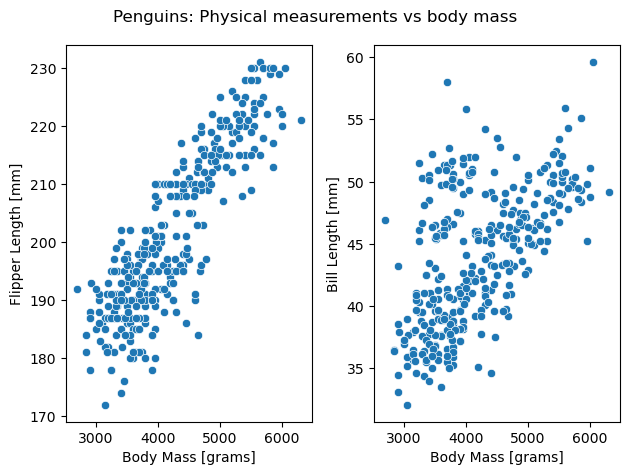

In [15]:
seaborn_subplots()

Let's take a look at that flipper length vs body mass relationship:
- Linear relation
- Two possible groups inside?
- Male / Female?

- Data points and attributes can be conditioned on categorical:
    - hue = __
    - style = ___

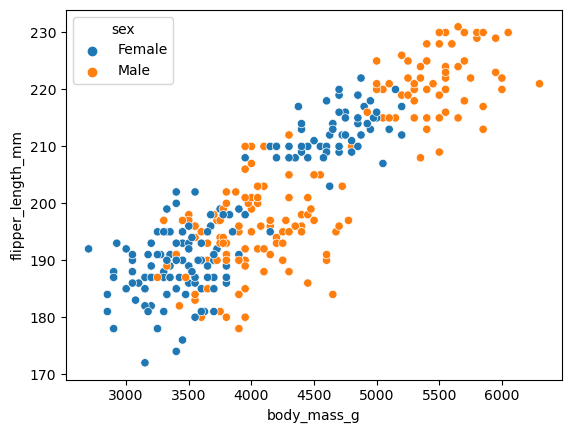

In [16]:
sns.scatterplot(x = 'body_mass_g', y = 'flipper_length_mm', hue = 'sex', data = penguins_df )
plt.show()

Male/female are subgroups within an outer grouping structure:
- Within each group:
    - males have longer flipper length/ larger body mass

What is the outer grouping structure?
- Derived from another categorical column in the dataset?

In [17]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


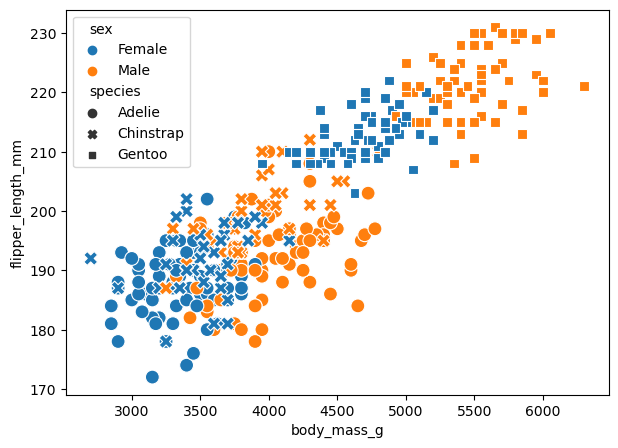

In [18]:
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = 'body_mass_g', y = 'flipper_length_mm', 
                style = 'species', s = 100, hue = 'sex', data = penguins_df)
plt.show()

What is this telling me?

Hue and style commands are keyword arguments of most seaborn commands:
- Very useful for visualizing behavior across different categorical distributions.

Can also qualitatively visualize the numerical value of another numerical attribute:

- variable size markers 
- conditioned on numeric column
    

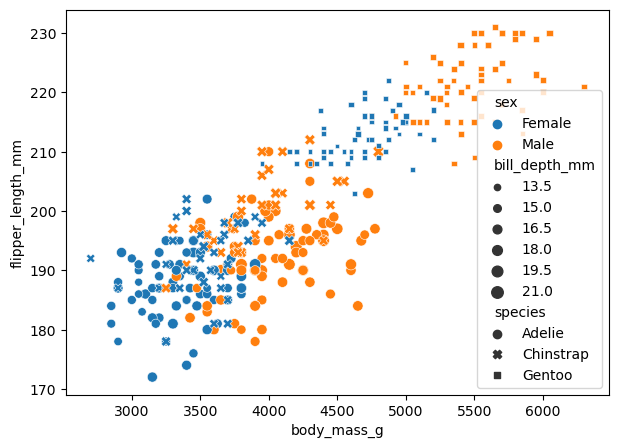

In [19]:
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = 'body_mass_g', y = 'flipper_length_mm', 
                style = 'species', size = 'bill_depth_mm',  hue = 'sex', data = penguins_df)
plt.show()

Was this useful?

- Tricky to compare sizes across markers
- Too many variables to think about:
    - different types
    - different visual representations
- Info overload

Golden mind-set:
- One plot: keep it sufficiently simple to visualize target relationships
- But rich enough that plot contains useful information.

**This is an art**. Comes with practice.

#### Distribution plots

- May be useful to take a look at this data from a different angle.
- accents different aspect of the data

#### The Box plot

Visualize summary statistics of distribution for numerical variable:
- conditioned across categorical variable.

Again:
- comparison of spread/median across groups
- useful for outlier detection

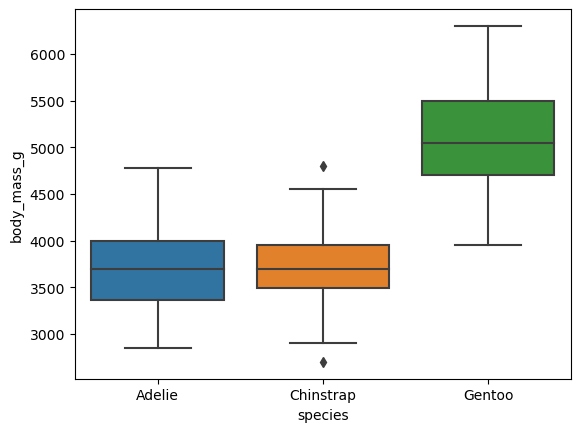

In [20]:
sns.boxplot(x = 'species', y = 'body_mass_g', 
            data = penguins_df, orient = 'v')
plt.show()

- Line is the medium
- Box is 25-75 IQR
- Whisker: 
    - (Q1 - 1.5 IQR, Q1)
    - (Q3, Q3 + 1.5 IQR)

For both body mass and flipper length:

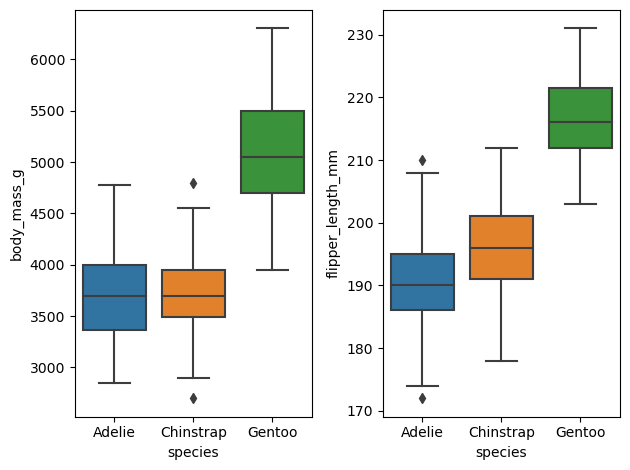

In [21]:
fig, ax = plt.subplots(1,2)
sns.boxplot(x = 'species', y = 'body_mass_g', data = penguins_df, orient = 'v', ax = ax[0])
sns.boxplot(x = 'species', y = 'flipper_length_mm', data = penguins_df, orient = 'v', ax = ax[1])
plt.tight_layout()

Some possible takeaways:
- Wider variation in gentoo masses on absolute scale than chinstrap
- Flipper length variation is similar for the two.

Maybe some other factor responsible for difference in spreads?

Seaborn has other numeric vs categorical distributional plots that are useful in this regard:
- sns.striplot
- sns.violinplot
- sns.swarmplot

#### striplot
- represents distribution by plotting the numeric values for each data point in a strip
- does for each categorical value
- useful when you want to visualize individual points and get a feel for density.

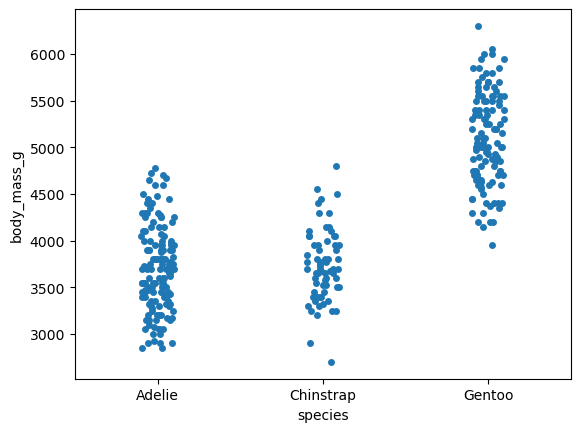

In [22]:
sns.stripplot(x = 'species', y = 'body_mass_g', 
            data = penguins_df, orient = 'v')
plt.show()

stripplot usually overlayed with another distributional plot:
- e.g., overlay with boxplot.
- useful with hue as well.

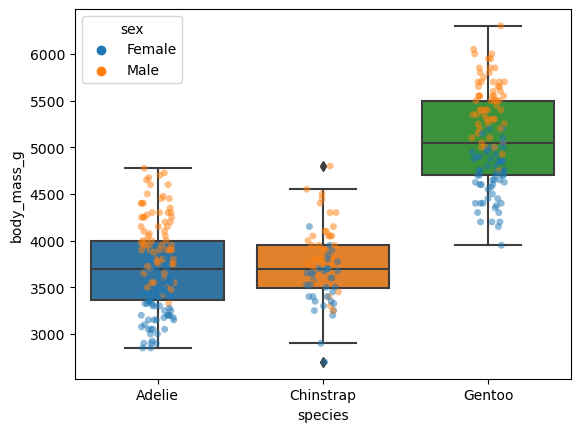

In [23]:
fig, ax = plt.subplots()
sns.stripplot(x = 'species', y = 'body_mass_g', 
            data = penguins_df, 
              ax = ax, hue = 'sex', alpha = 0.5)
sns.boxplot(x = 'species', y = 'body_mass_g', 
            data = penguins_df, ax = ax)
plt.show()

Plotting this for both flipper length and body mass and side by side:

In [24]:
%%capture boxstrip

fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.stripplot(x = 'species', y = 'body_mass_g', data = penguins_df, ax = ax[0], hue = 'sex', alpha = 0.5)
sns.boxplot(x = 'species', y = 'body_mass_g', data = penguins_df, orient = 'v', ax = ax[0])

sns.boxplot(x = 'species', y = 'flipper_length_mm', data = penguins_df, orient = 'v', ax = ax[1])
sns.stripplot(x = 'species', y = 'flipper_length_mm', data = penguins_df, ax = ax[1], hue = 'sex', alpha = 0.5)
plt.tight_layout()

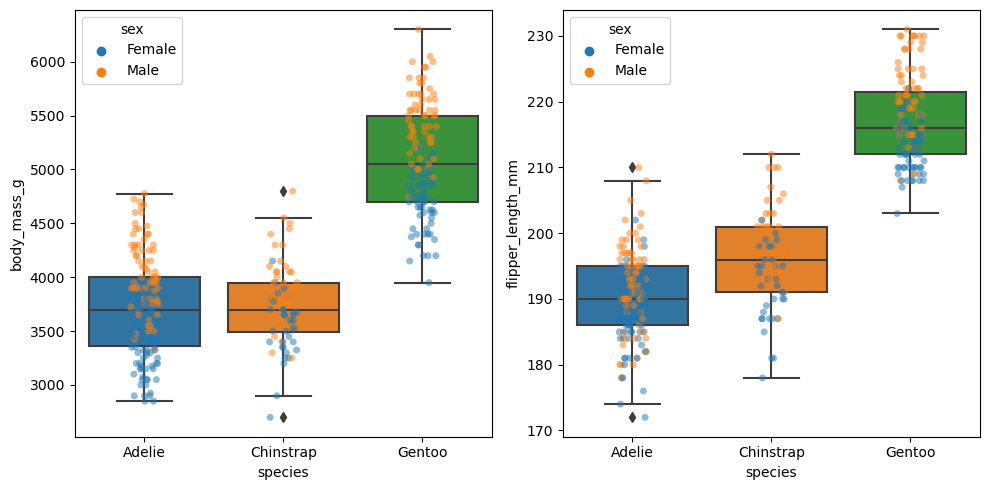

In [25]:
boxstrip()

What is a reasonable thing to infer from these plots?

Some downsides of:
- stripplot
- boxplot


Neither provides a way to visualize shape of distributions. 

Shape of mass distributions:

- bimodal?
- uniform?

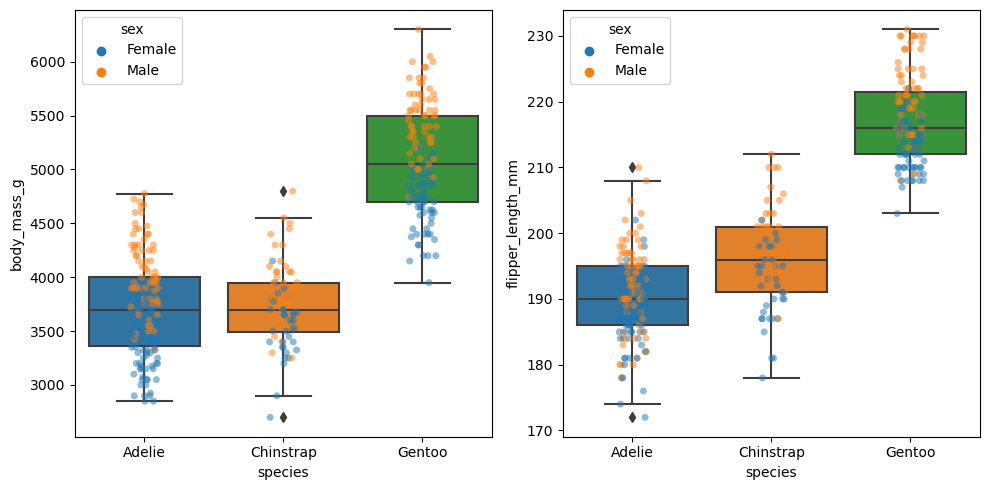

In [26]:
boxstrip()

Have not taken advantage of the lateral dimension:
- use to represent distribution weight at particular values of numerical variable

- sns.swarmplot
- sns.violinplot

#### swarmplot (similar to stripplot, but)
- points are adjusted (along the categorical axis) so that they don’t overlap. 
- fattens width where dense number of observations
- better representation of the distribution of values

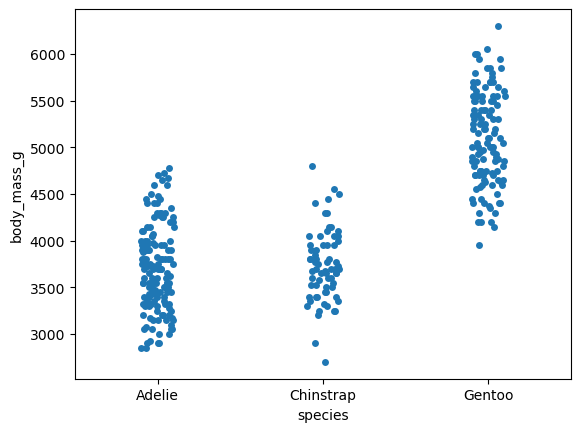

In [27]:
sns.stripplot(x = 'species', y = 'body_mass_g', 
            data = penguins_df)
plt.show()

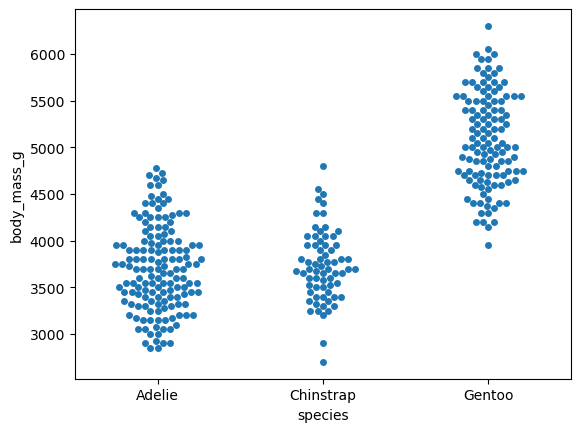

In [28]:
sns.swarmplot(x = 'species', y = 'body_mass_g', 
            data = penguins_df)
plt.show()

Bimodality apparent for Gentoo.

Again, can overlay with a box plot if you want:
- changing transparency on boxplot may be useful.

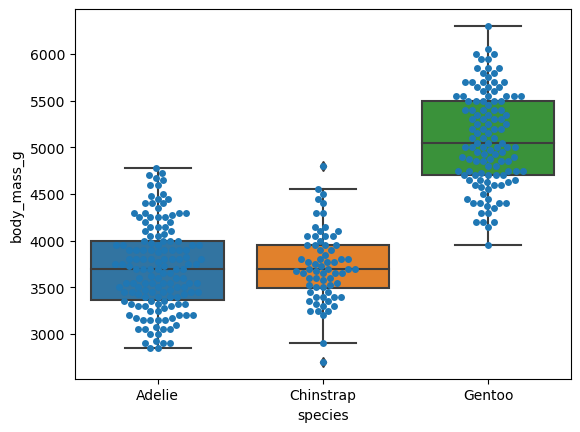

In [29]:
fig, ax = plt.subplots()
sns.swarmplot(x = 'species', y = 'body_mass_g', data = penguins_df, ax = ax)
sns.boxplot(x = 'species', y = 'body_mass_g', data = penguins_df, ax = ax)

plt.show()

Now let's add a hue on sex:

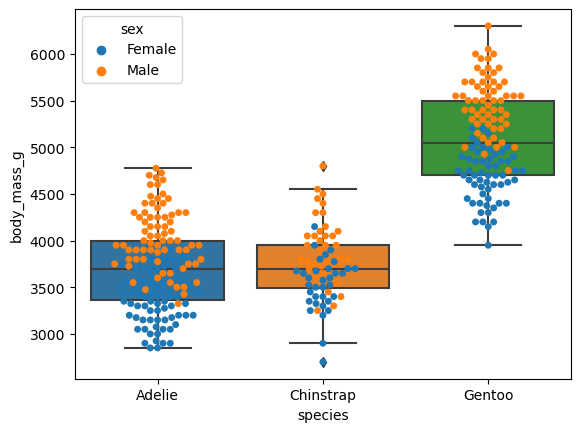

In [30]:
fig, ax = plt.subplots()
sns.swarmplot(x = 'species', y = 'body_mass_g', hue = 'sex', data = penguins_df, ax = ax)
sns.boxplot(x = 'species', y = 'body_mass_g', data = penguins_df, ax = ax)

plt.show()

One issue with swarmplots:
- not scalable as data gets large.
- warnings start to get thrown: cant fit data on plot
- want a proper approximation of the continuous distribution.

Enter: the violin plot
- plots distribution for numerical attribute
- width represents density of data

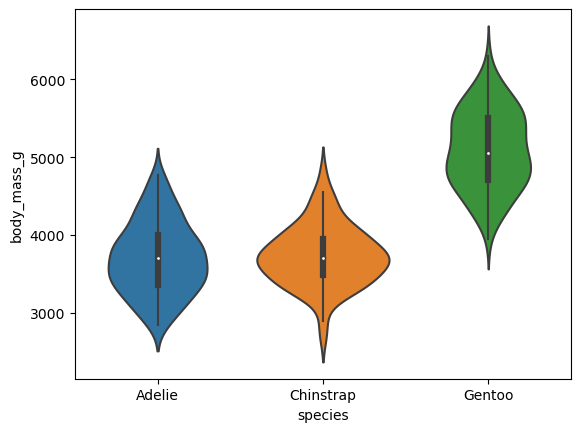

In [31]:
sns.violinplot(x = 'species', y = 'body_mass_g', data = penguins_df)
plt.show()

Can hue to view distribution across another categorical side by side:

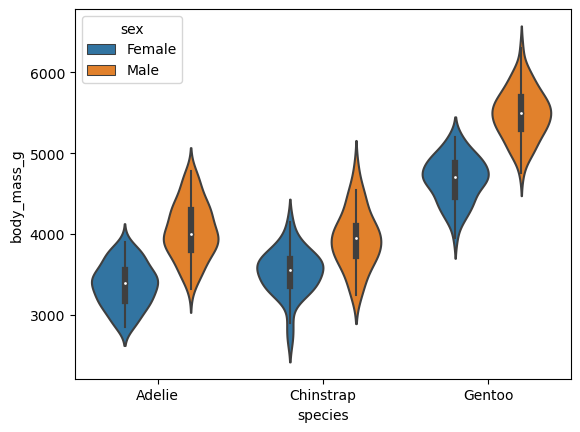

In [32]:
sns.violinplot(x = 'species', y = 'body_mass_g', hue = 'sex', data = penguins_df)
plt.show()

In the specific but useful case where hue variable is binary:
- Can use split = ___ argument

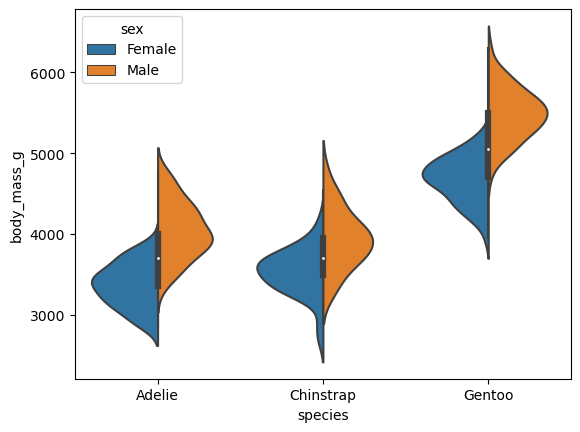

In [33]:
sns.violinplot(x = 'species', y = 'body_mass_g',
               hue = 'sex', split = True, 
               data = penguins_df)
plt.show()

- Median/IQR comparisons (less clear than boxplot but still good)
- Sexual dimorphism is very apparent:
    - Investigate subpopulation distributions: normal

Can always overlay with a stripplot:

In [34]:
%%capture violinsubplots
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.violinplot(x = 'species', y = 'body_mass_g', hue = 'sex', split = True, data = penguins_df, ax = ax[0])
sns.stripplot(x = 'species', y = 'body_mass_g', hue = 'sex', data = penguins_df, palette= ['orange','blue'], ax = ax[0])
sns.violinplot(x = 'species', y = 'flipper_length_mm', hue = 'sex', split = True, data = penguins_df, ax = ax[1])
sns.stripplot(x = 'species', y = 'flipper_length_mm', hue = 'sex', data = penguins_df, palette= ['blue', 'orange'], ax = ax[1])
plt.show()

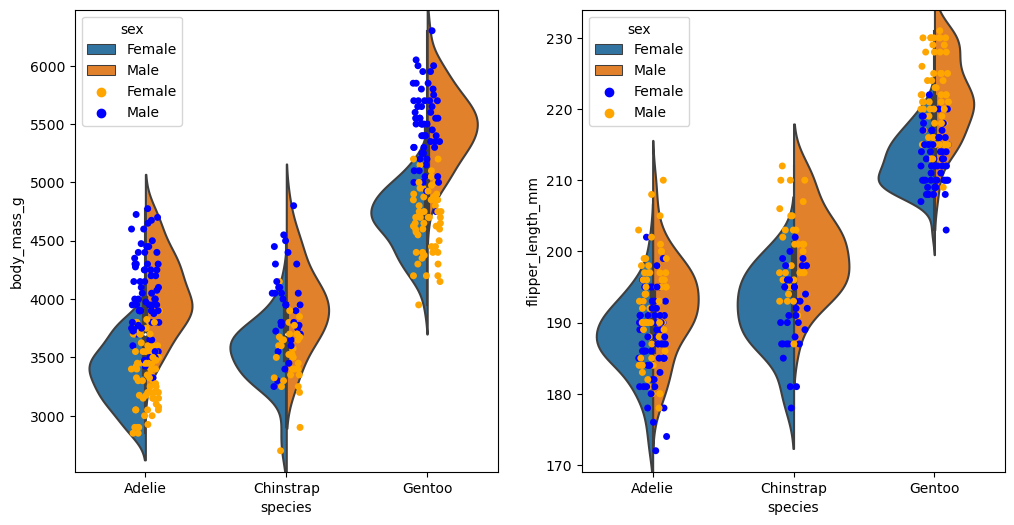

In [35]:
violinsubplots()

The same data displayed in a different format can make apparent different things:

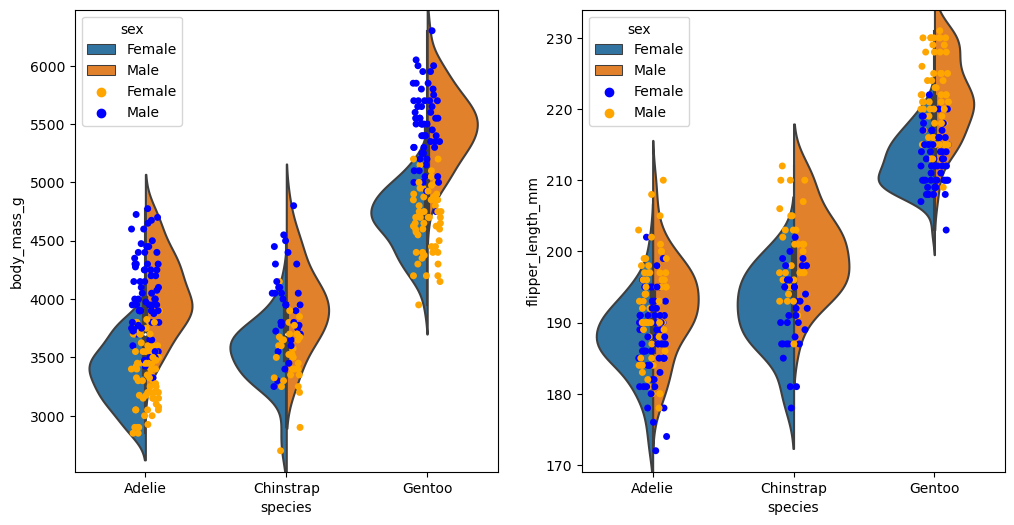

In [36]:
violinsubplots()

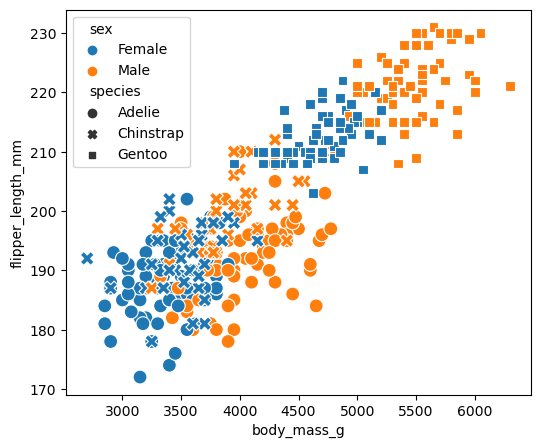

In [37]:
fig, ax = plt.subplots(figsize = (6,5))
sns.scatterplot(x = 'body_mass_g', y = 'flipper_length_mm', 
                style = 'species', s = 100, hue = 'sex', data = penguins_df)
plt.show()

#### sns.histplot

- just visualize the distribution of numerical variable with a histogram

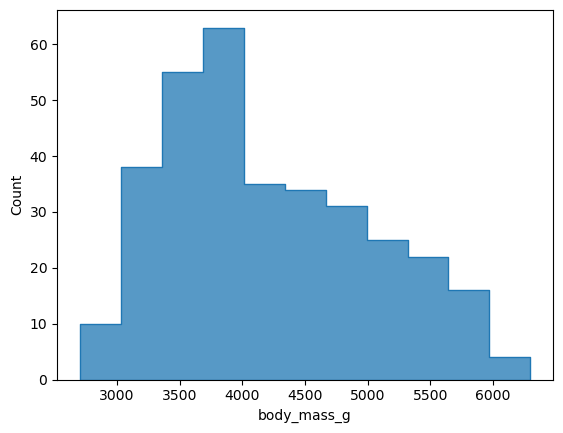

In [44]:
sns.histplot(x = 'body_mass_g', element="step", data = penguins_df)
plt.show()

- also takes in hue argument
- visualize histogram for subpopulations

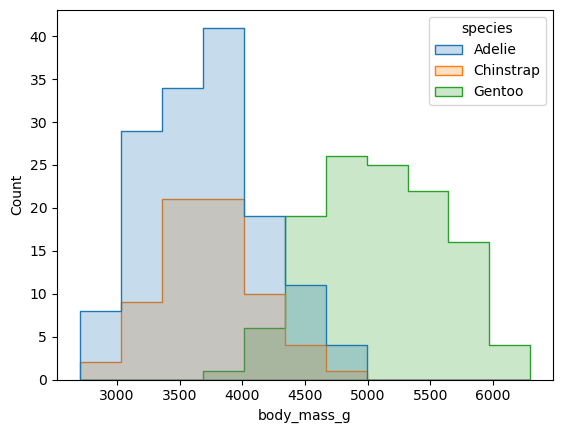

In [45]:
sns.histplot(x = 'body_mass_g', hue = 'species', element="step", data = penguins_df)
plt.show()

Useful to normalize histograms to get proportion of subpopulations:
- stat = ___ (count, percent, proportion, ...)
- common_norm = ___ (true, false)

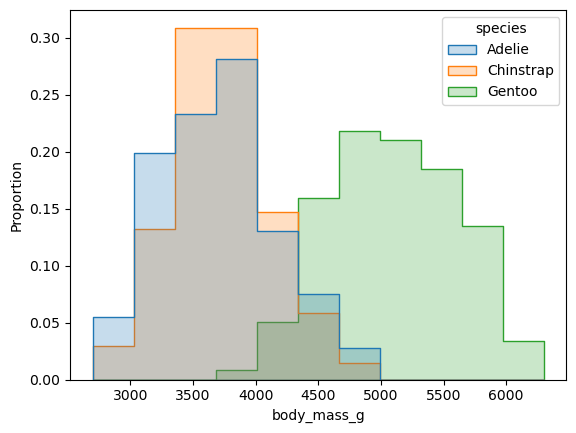

In [46]:
sns.histplot(x = 'body_mass_g', hue = 'species', element="step", stat="proportion", 
             common_norm= False, data = penguins_df)
plt.show()

Can also change number of bins:


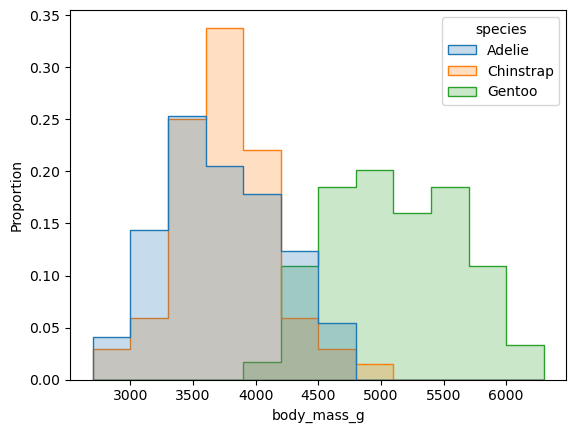

In [47]:
# difference between 11 and 12 bins
sns.histplot(x = 'body_mass_g', hue = 'species', element="step", stat="proportion", 
             common_norm=False, bins = 12, data = penguins_df)
plt.show()

Binning bias can be an issue:
- The empirical cumulative distribution solves this problem:

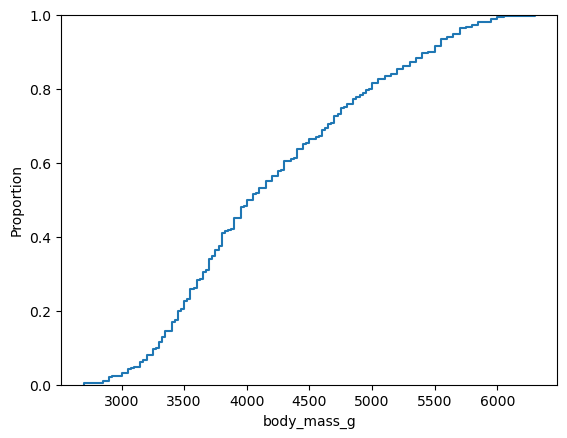

In [48]:
sns.ecdfplot(x = 'body_mass_g', data = penguins_df)
plt.show()

For given $x$ value (mass):

- percentage of data that is equal to or less than given value.
- this value doesn't require data discretization: no binning artifacts

With hue:

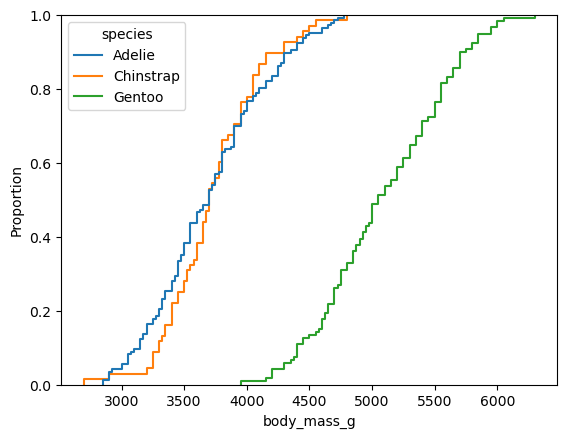

In [49]:
sns.ecdfplot(x = 'body_mass_g', hue = 'species',
             data = penguins_df)
plt.show()

- These plots can be very useful when comparing with theoretical cumulative distributions.
- i.e. plot against a theoretical cdf:
    - normal
    - poisson
    - exponential, etc...

#### Multivariate/Bivariate continuous data
- want to look at how data is distributed across two continuous explanatory variables
- Beak length and beak depth
- See distributions on individual histograms (marginals).

sns.jointplot is very useful here.

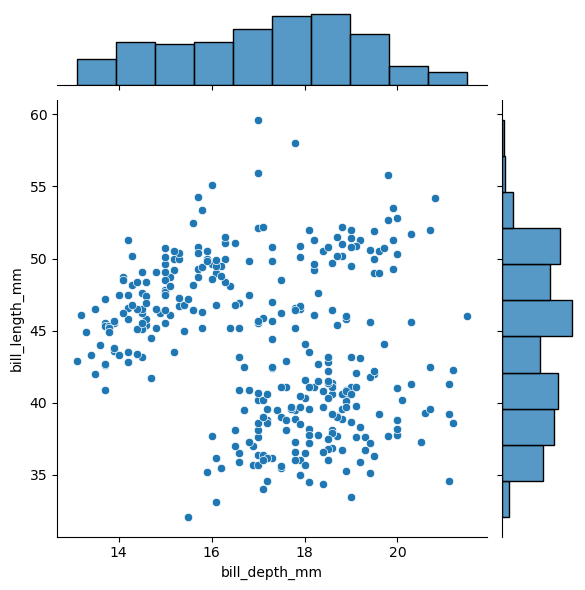

In [50]:
sns.jointplot(x = 'bill_depth_mm', y = 'bill_length_mm', data = penguins_df)
plt.show()

Particularly when data is dense and overlapping:
- will be true for larger datasets.
- a 2D histogram / hex distribution might be useful.

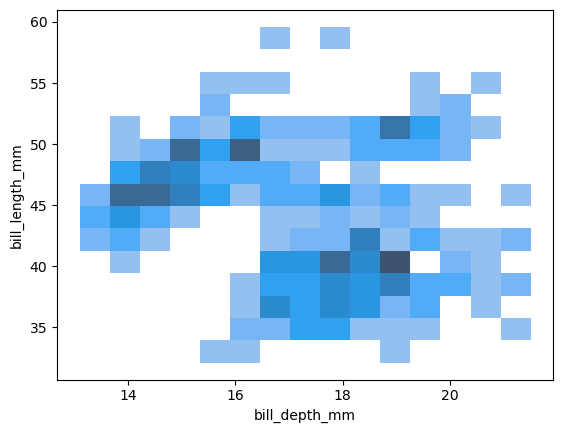

In [51]:
sns.histplot(x = 'bill_depth_mm', y = 'bill_length_mm',  bins = 15, data = penguins_df)
plt.show()

Can be useful to view the marginal histograms on the side:

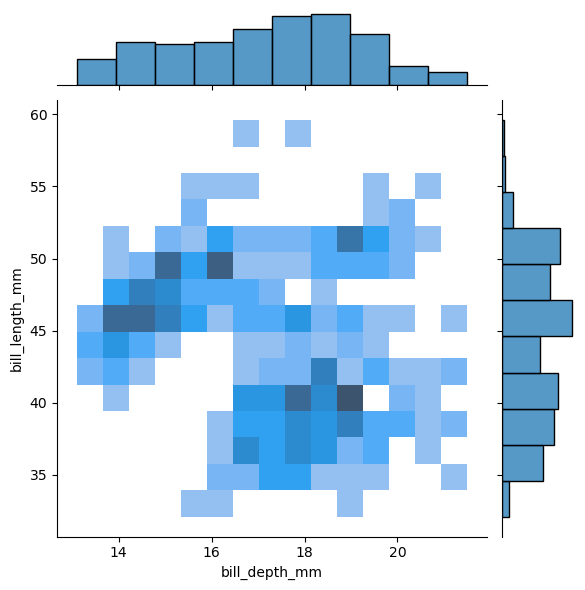

In [52]:
sns.jointplot(x = 'bill_depth_mm', y = 'bill_length_mm', kind = 'hist',
               joint_kws = dict(bins = 15), data = penguins_df)
plt.show()

A hex distribution version of the jointplot can also be quite nice:

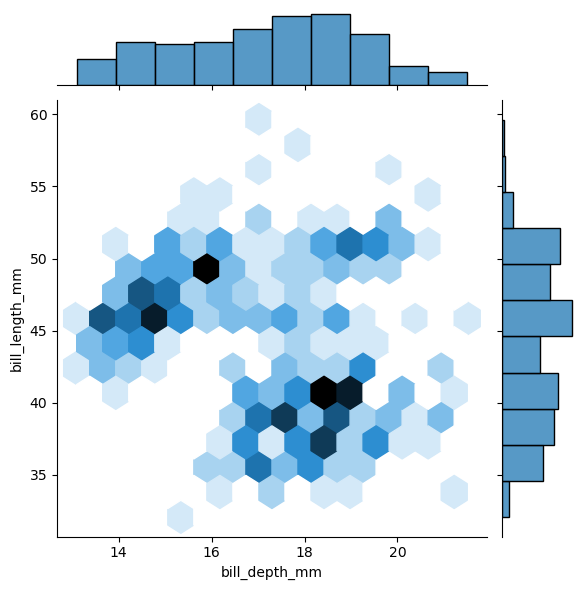

In [53]:
sns.jointplot(x = 'bill_depth_mm', y = 'bill_length_mm', kind = 'hex',
              joint_kws = dict(gridsize = 15), data = penguins_df)
plt.show()

There could legitimately be three clusters here:
- is there a categorical that could explain these groupings?
- let's hue by it.

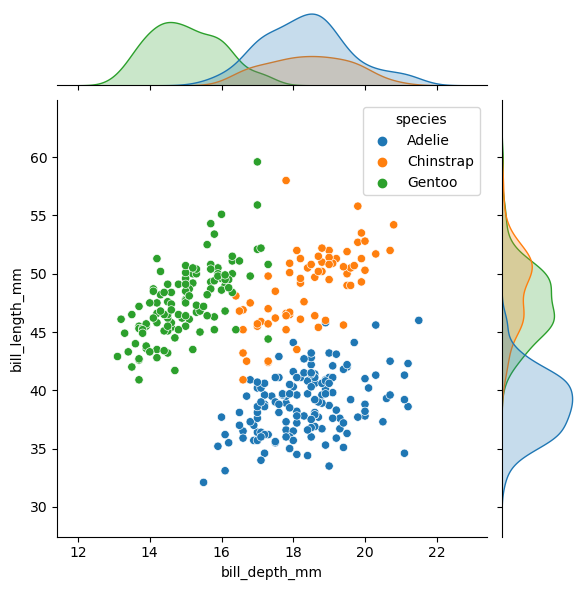

In [54]:
sns.jointplot(x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'species', data = penguins_df)
plt.show()

That gives us a lot of info:
- species clustering in this space
- distribution differences across species in the marginal variables

#### Relational plotting and facet gridding
- want to look at relationship between two continuous numerical variables:
    - flipper length
    - body mass
- conditioned across multiple categorical variables (different species, different sex)



#### sns.relplot 

- can create a grid plotting relations between continuous numerical variables
- for each realization of categoricals

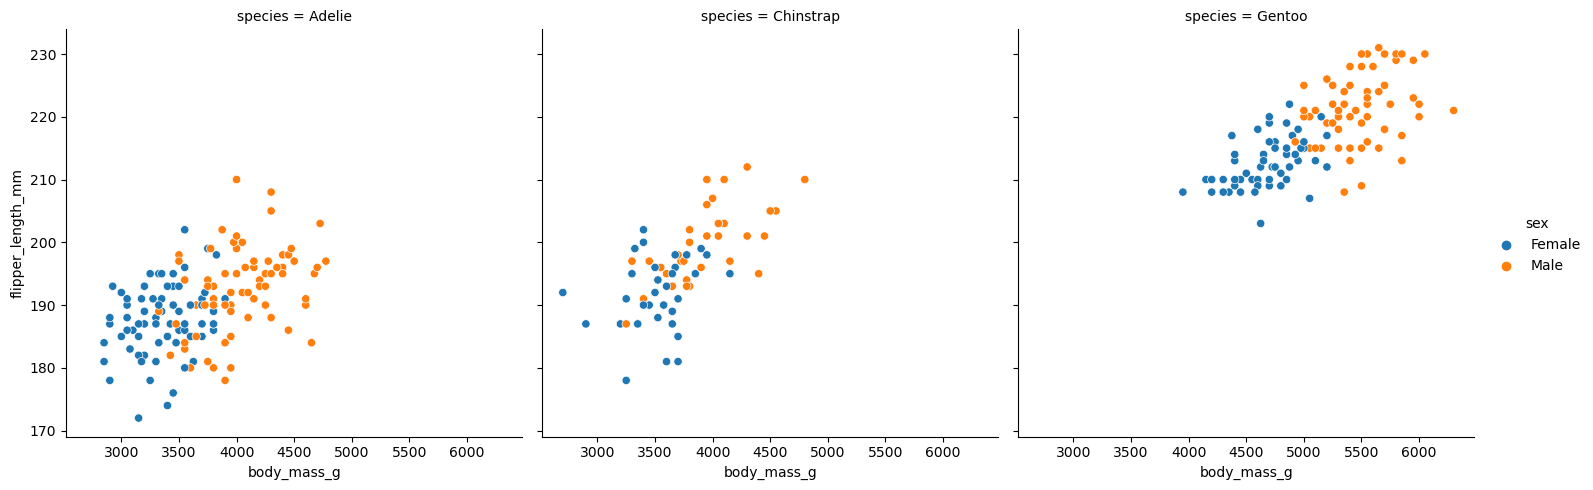

In [55]:
sns.relplot(x = 'body_mass_g', y = 'flipper_length_mm', hue = 'sex', col = 'species', data = penguins_df)
plt.show()

Extending this to include islands:
- creates a grid (known as a facet grid)

In [ ]:
sns.relplot(x = 'body_mass_g', y = 'flipper_length_mm', hue = 'sex', row = 'island', col = 'species', data = penguins_df)
plt.show()

This was cool:
- Can we do a similar thing with our distribution plots?
    - box plots
    - violin plots
    - stripplots, etc.

#### sns.catplot
- exact same logic as relplot but with a numeric vs categorical variable

In [ ]:
sns.catplot(x = 'species', y = 'body_mass_g', kind = 'box', col = 'sex', data = penguins_df)
plt.show()

Can extend the facet with rows from another categorical.

In [ ]:
sns.catplot(x = 'species', y = 'body_mass_g', kind = 'box', col = 'island', row = 'sex', data = penguins_df)
plt.show()

But how do we overlay other plots on this grid of boxplots?
- e.g. overlay swarmplots on grid of boxplots
- Seaborn has a method for this.
- .map_dataframe() method will do the trick.

In [ ]:
penguins_df

In [ ]:
g = sns.catplot(x = 'species', y = 'body_mass_g', kind = 'box', col = 'island', row = 'sex', data = penguins_df)
g.map_dataframe(sns.swarmplot, x="species", y = 'body_mass_g', color = 'yellow', alpha=0.6, dodge=True)

plt.show()

There are other forms of numerical variable vs categorical plots:

statistics of numerical feature vs. category: aggregations
- bar plots
- count plots
- point plots 

Barplots in seaborn a little different than in matplotlib and pandas plot:
- pandas plot case:

Get a barplot of mean body mass by species.

In [ ]:
species_means = penguins_df.groupby(
    'species').mean(numeric_only = True)
species_means['body_mass_g']

Just plots values for each index value.

In [ ]:
species_means['body_mass_g'].plot(
    kind = 'bar')
plt.show()

Seaborn barplot is designed to:
- aggregate a numerical column and give us statistical information on the aggregation
- as a function of a categorical grouping
- estimate uncertainty on aggregation

Get a barplot of mean body mass by species:
- note: using original dataframe.
- seaborn does the groupby/aggregation for you.

sns.barplot:
- default estimator is mean
- error bars are default at 95% confidence interval

In [ ]:
# ci specifies a measure of uncertainty in the mean.
sns.barplot(x = 'species', y = 'body_mass_g', data = penguins_df)
plt.show()

Can change the statistical estimator on the groupby:
- change aggregation function to median
- change confidence level

In [ ]:
sns.barplot(x = 'species', y = 'body_mass_g', data = penguins_df, errorbar=('ci', 99.9), estimator = np.median)
plt.show()

Can take in custom aggregation functions:
- Will build confidence intervals (uncertainty measure) for you.
- Does this by bootstrap estimation.

Let's extract the statistic:

$$ \hat{T} = \sum_i \Big| \ X_i - \bar{X} \Big| $$

Also want to visualize confidence interval in $T$ at 99.99% level

In [ ]:
def fun_estimator(input_series):
    
    X_centered = input_series - input_series.mean()
    fun_est = np.abs(X_centered).sum()
    return fun_est
    

In [ ]:
sns.barplot(x = 'species', y = 'body_mass_g', data = penguins_df, errorbar=('ci', 99.99), estimator = fun_estimator)
plt.show()

#### Point Plots

- In some cases we want to pay attention just to difference in:
    - aggregated statistics across groups
    - their uncertainties

Might occur for full scale on a bar plot:
- statistically significant differences harder to see.

In [ ]:
def another_fun_estimator(input_series):

    chisquared_centered = (input_series - input_series.mean())**2
    another_fun_est = np.log(chisquared_centered.sum())
    return another_fun_est

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'species', y = 'body_mass_g', data = penguins_df, 
            errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[0])

sns.pointplot(x = 'species', y = 'body_mass_g', data = penguins_df,
              errorbar=('ci', 99.99),estimator = another_fun_estimator, ax = ax[1])
plt.show()

Point plots should be plotted next to their full scale bar plots:
- Viewers can view statistical significance (point plot)
- as well as think about *actual* significance (full scale)

#### Countplots
- We already know what these are. Counts on a categorical.
- Seaborn can do this without needing an aggregation

In [ ]:
sns.countplot(x = 'species', data = penguins_df)
plt.show()

We might want to take barplots, countplots, pointplots:
- construct a facet grid off of other categories

**sns.catplot will work for this**

Get counts for each species:
- Across islands
- Across sex

- catplot will do filtering by plot for each unique set of island and sex values.
- groupby on species
- count aggregation


In [ ]:
sns.catplot(x = 'species', kind = 'count', col = 'island', row = 'sex', data = penguins_df)
plt.show()

A similar thing follow for barplots and pointplots.

In [ ]:
sns.catplot(x = 'species', y = 'body_mass_g', kind = 'bar', 
            col = 'sex', errorbar=('ci', 99.99), estimator = np.median, data = penguins_df)
plt.show()

#### Pair plots:
- Useful for plotting relationships between numeric columns.
- visualizing data distribution for each numeric column.

**Probably one of the first visualizations you should try after data cleaning**

In [ ]:
sns.pairplot(penguins_df, corner = True)
plt.show()

- Distributions on diagonals
- Scatterplots on off diagonals.

Can also hue this:

In [ ]:
sns.pairplot(penguins_df, hue = 'species', 
             corner = True)
plt.show()

- Hue option defaults diagonals to kdes: smoothened distribution. 

Pairplot can take additional arguments for:
- type of diagonal plot (diag_kind = 'hist', 'kde')
- type of off diagonal plot (kind = 'hist','kde')

In [ ]:
%%capture histhistpair
sns.pairplot(penguins_df, hue = 'species', diag_kind= "hist", kind = "hist",
             diag_kws = {'element': 'step'}, plot_kws = {'bins': 15}, corner = True)
plt.show()

In [ ]:
histhistpair()

A caveat on pairplots:
- very expensive memory-wise and time-wise to create
- for larger datasets: may need to downsample dataframe
- or else will take forever

In [ ]:
down_sample_df = penguins_df.sample(100)
down_sample_df.info()

In [ ]:
sns.pairplot(down_sample_df, hue = 'species', 
             corner = True)
plt.show()